# Project 2 : Thera Bank Personal Loan Campaign
#### Steps and tasks:

### 1.Import the datasets and libraries, check datatype, statistical summary,shape,null 
### values or incorrect imputation. (5 marks)


In [182]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd                                            
import numpy as np                                             
import matplotlib.pyplot as plt                                
%matplotlib inline
import seaborn as sns 
pd.options.display.float_format = '{:,.2f}'.format        

# Update default style and size of charts
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [5, 4]

# Increase cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

# Increase max number of rows and columns to display in pandas tables
pd.set_option('display.max_columns', 500)           
pd.set_option('display.max_rows', 500) 

In [183]:
df=pd.read_csv ('Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1


In [184]:
print("Data types: ", df.info())
print("")
print("Shape of the Dataframe: ", df.shape)
print("")
print("Checking for null values:  ", df.isnull().sum())
print("")
print("Statistical summary: ")
df.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
Data types:  None

Shape of the Dataframe:  (5000, 14)



,count,mean,std,min,25%,50%,75%,max
ID,"5,000.00","2,500.50","1,443.52",1.00,"1,250.75","2,500.50","3,750.25","5,000.00"
Age,"5,000.00",45.34,11.46,23.00,35.00,45.00,55.00,67.00
Experience,"5,000.00",20.10,11.47,-3.00,10.00,20.00,30.00,43.00
Income,"5,000.00",73.77,46.03,8.00,39.00,64.00,98.00,224.00
ZIP Code,"5,000.00","93,152.50","2,121.85","9,307.00","91,911.00","93,437.00","94,608.00","96,651.00"
Family,"5,000.00",2.40,1.15,1.00,1.00,2.00,3.00,4.00
CCAvg,"5,000.00",1.94,1.75,0.00,0.70,1.50,2.50,10.00
Education,"5,000.00",1.88,0.84,1.00,1.00,2.00,3.00,3.00
Mortgage,"5,000.00",56.50,101.71,0.00,0.00,0.00,101.00,635.00
Personal Loan,"5,000.00",0.10,0.29,0.00,0.00,0.00,0.00,1.00


In [185]:
print("correlations: ")
df.corr()

correlations: 


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.00,-0.01,-0.01,-0.02,0.01,-0.02,-0.02,0.02,-0.01,-0.02,-0.02,-0.01,-0.00,0.02
Age,-0.01,1.00,0.99,-0.06,-0.03,-0.05,-0.05,0.04,-0.01,-0.01,-0.00,0.01,0.01,0.01
Experience,-0.01,0.99,1.00,-0.05,-0.03,-0.05,-0.05,0.01,-0.01,-0.01,-0.00,0.01,0.01,0.01
Income,-0.02,-0.06,-0.05,1.00,-0.02,-0.16,0.65,-0.19,0.21,0.50,-0.00,0.17,0.01,-0.00
ZIP Code,0.01,-0.03,-0.03,-0.02,1.00,0.01,-0.00,-0.02,0.01,0.00,0.00,0.02,0.02,0.01
Family,-0.02,-0.05,-0.05,-0.16,0.01,1.00,-0.11,0.06,-0.02,0.06,0.02,0.01,0.01,0.01
CCAvg,-0.02,-0.05,-0.05,0.65,-0.00,-0.11,1.00,-0.14,0.11,0.37,0.02,0.14,-0.00,-0.01
Education,0.02,0.04,0.01,-0.19,-0.02,0.06,-0.14,1.00,-0.03,0.14,-0.01,0.01,-0.02,-0.01
Mortgage,-0.01,-0.01,-0.01,0.21,0.01,-0.02,0.11,-0.03,1.00,0.14,-0.01,0.09,-0.01,-0.01
Personal Loan,-0.02,-0.01,-0.01,0.50,0.00,0.06,0.37,0.14,0.14,1.00,0.02,0.32,0.01,0.00


We can see negative values in the 'Experience' (Number of years of proffesional experience), I asume those are incorrect inputations.
Also, there is a high correlation (.99) of Experince with Age. 
I asume Zip code could be correlated with Income, 
We can drop  ID (a number assigned by the bank)

In [186]:
df2= df.drop(['ID'], axis=1) # For the moment I'm only dropping ID as is a number asigned by the bank and 1 to 1 to each bank customer


### 2.EDA:  Study  the  data  distribution  in  each  attribute  and  target  variable,  share  your  findings(20 marks)

#### 2.1 Number of unique in each column?

In [187]:
print ("Number of unique values in each column:")
for i in list(df.columns):   # checking value counts of all object type columns
    print([i])
    print(df[i].nunique())
    print()

Number of unique values in each column:
['ID']
5000

['Age']
45

['Experience']
47

['Income']
162

['ZIP Code']
467

['Family']
4

['CCAvg']
108

['Education']
3

['Mortgage']
347

['Personal Loan']
2

['Securities Account']
2

['CD Account']
2

['Online']
2

['CreditCard']
2



#### 2.2 Number of people with zero mortgage

In [188]:
ZM1= df2[df2['Mortgage']==0]
print("The number of people with Zero Mortgage is: ", ZM1["Mortgage"].count())

The number of people with Zero Mortgage is:  3462


#### 2.3  Number of people with zero credit card spending per month?

In [189]:
ZCC= df2[df2['CCAvg']==0]
print("The number of people with Zero Credit Card use is: ", ZCC["CCAvg"].count())

The number of people with Zero Credit Card use is:  106


#### 2.4 Value counts of all categorical columns.

In [190]:
for i in list(['Education','Personal Loan','Securities Account','CD Account','Online','CreditCard', 'Family','Income','Experience','Age','Mortgage','ZIP Code', 'CCAvg']):   # checking value counts of all integer type columns
    print([i])
    print(df[i].value_counts())
    print()

['Education']
1    2096
3    1501
2    1403
Name: Education, dtype: int64

['Personal Loan']
0    4520
1     480
Name: Personal Loan, dtype: int64

['Securities Account']
0    4478
1     522
Name: Securities Account, dtype: int64

['CD Account']
0    4698
1     302
Name: CD Account, dtype: int64

['Online']
1    2984
0    2016
Name: Online, dtype: int64

['CreditCard']
0    3530
1    1470
Name: CreditCard, dtype: int64

['Family']
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

['Income']
44     85
38     84
81     83
41     82
39     81
40     78
42     77
83     74
43     70
45     69
29     67
21     65
35     65
22     65
85     65
25     64
84     63
28     63
30     63
55     61
82     61
78     61
65     60
64     60
32     58
61     57
53     57
80     56
58     55
62     55
31     55
23     54
34     53
18     53
59     53
79     53
54     52
19     52
49     52
60     52
33     51
70     47
52     47
20     47
24     47
75     47
69     46
63     46
50    

#### 2.5 Univariate and Bivariate

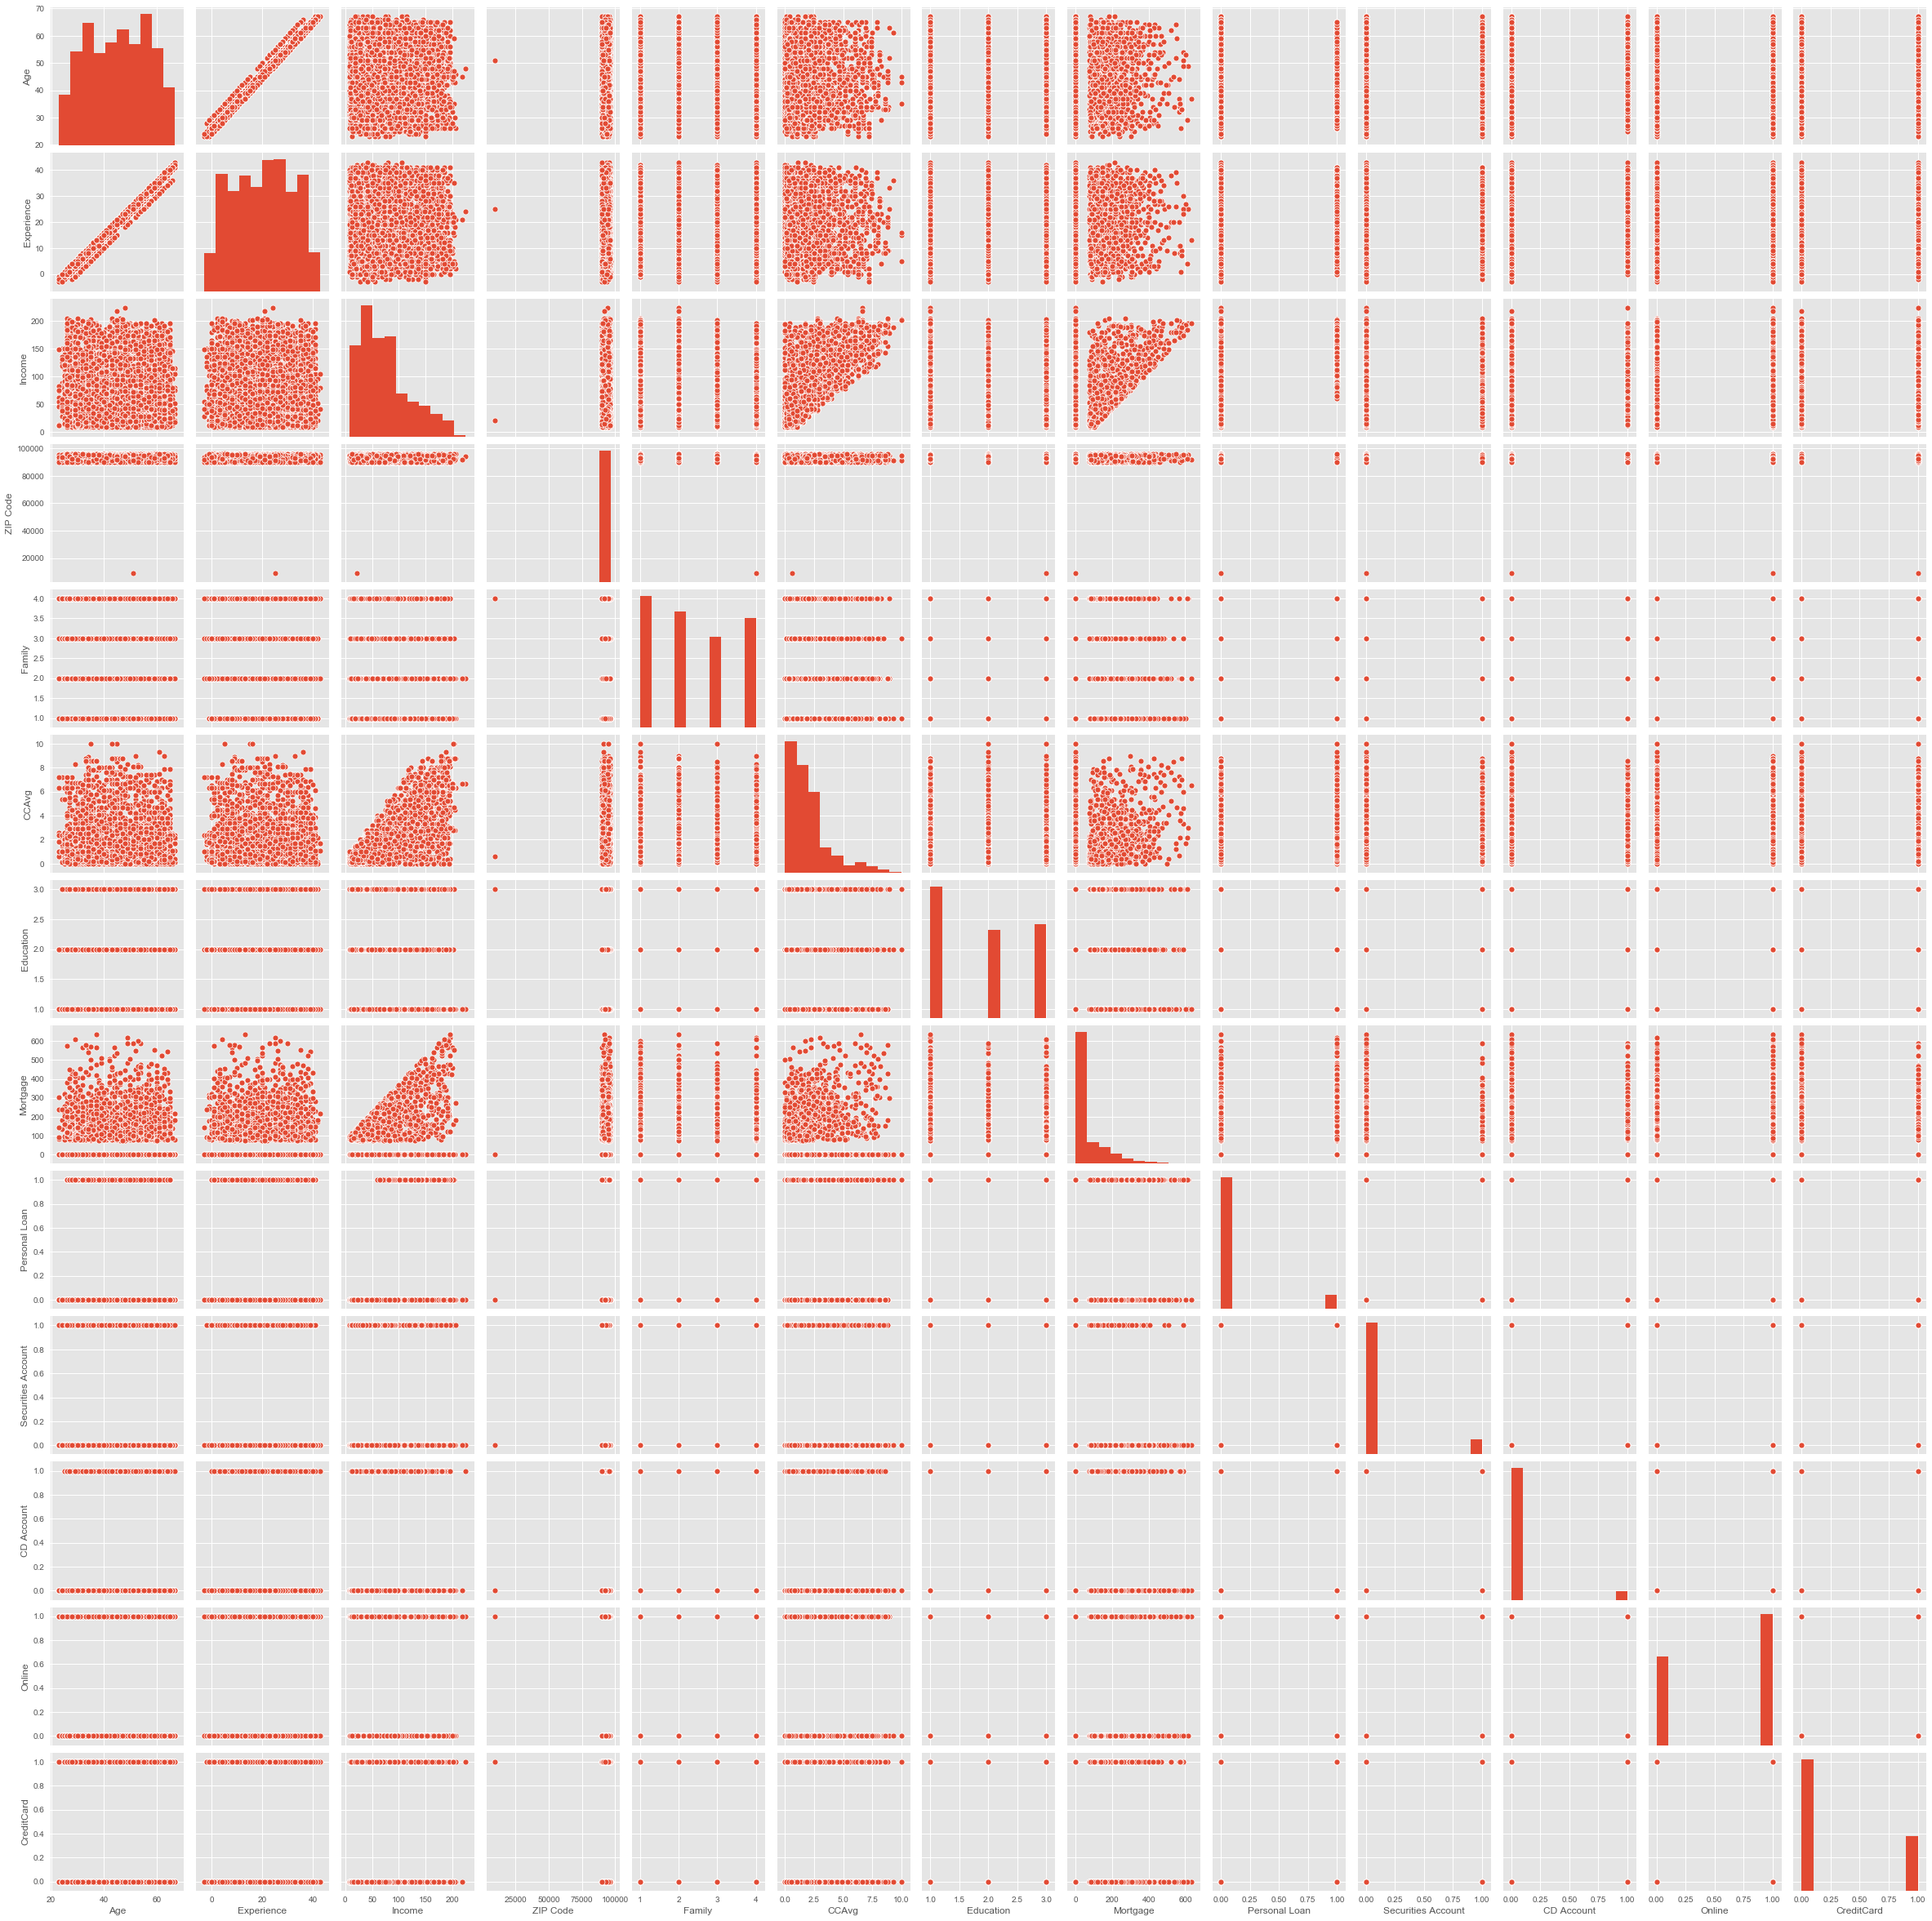

In [191]:
sns.pairplot(df2)

##### From the pairplot we confirm there is a strong correlation between Experience and Age
##### We also see a high biased Zip Code

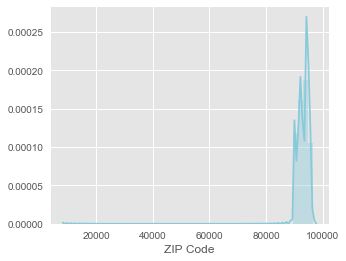

In [192]:
# Due to the high bias of zip code (Few customers with a very different)
sns.distplot(df['ZIP Code'],  color='C') 
# here is a closer look:          (Later on we can decide to drop or normalize Zip code column)

#### 2.6 Get data model ready

In [193]:
## Define X and Y variables:
X = df2.drop('Personal Loan', axis=1)
Y = df2[['Personal Loan']]
## Generating dummies:
X = pd.get_dummies(X, drop_first=True)


### 3.Split the data into training and test set in the ratio of 70:30 respectively (5marks)


In [194]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=1)

### 4.Use Logistic Regression model to predict the numberof a customers buying personal loans. 
### Print all the metrics related for evaluating the model performance (15marks)

In [195]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegressionCV    # Using Cross Validation to reduce overfitting

FirstModel = LogisticRegressionCV(random_state=33)
FirstModel.fit(X_train, y_train)
#Default solver: lbfgs

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=33, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [196]:
y_predict = FirstModel.predict(X_test)

In [197]:
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Confusion Matrix


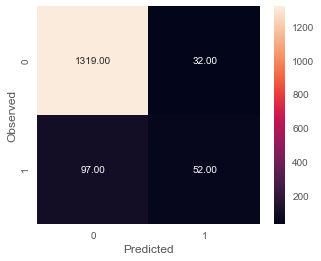

None
 
Trainig accuracy 0.9117142857142857

Testing accuracy 0.914

Recall: 0.348993288590604

Precision: 0.6190476190476191

F1 Score: 0.44635193133047213

Roc Auc Score: 0.6626535650947099


In [198]:
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print(" ")
print("Trainig accuracy",FirstModel.score(X_train,y_train))  
print()
print("Testing accuracy",FirstModel.score(X_test, y_test))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

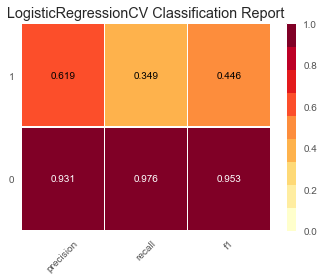

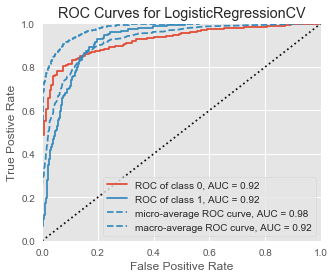

In [199]:
from yellowbrick.classifier import ClassificationReport, ROCAUC
# Visualize model performance with yellowbrick library
viz = ClassificationReport(FirstModel)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(FirstModel)
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

Although the Accuracy is high I would not recommend to use this model yet because Recall and F1 metrics are low,  but the model can be improved. 
from all of those which would take the personal loan, we have a high rate of False Negatives

### 5.Give your reasoning on how can the model perform better? (10 marks)
#### Hint: Check parameter

To improve the model we  can try using a different solver. Also we could drop highly biased columns such as Zip Code which could be correlated with Income. Further, we could fix the negative values of Experience.

After several runs, I decide to explore different solver and drop Zip Code.

So, the improved model is:

In [202]:
# Substituting negative values by the mode
df3=df2
df3.Experience=df3.mask(df3.Experience.lt(0),df2.Experience.mode(), axis=1)

df4= df3.drop(['ZIP Code'], axis=1) # dropping ID and 'Zip Code' as per above comment


Confusion Matrix


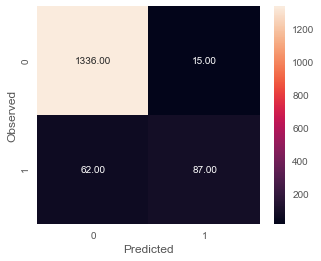

None

Trainig accuracy 0.9531428571428572

Testing accuracy 0.9486666666666667

Recall: 0.5838926174496645

Precision: 0.8529411764705882

F1 Score: 0.6932270916334662

Roc Auc Score: 0.7863948653495546


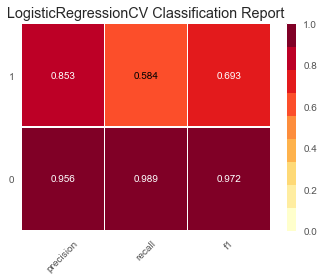

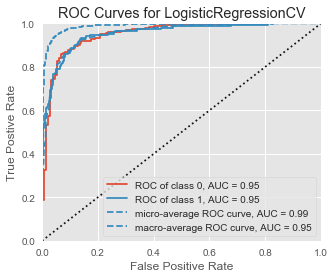

In [203]:
X = df4.drop('Personal Loan', axis=1)
Y = df4[['Personal Loan']]
X = pd.get_dummies(X, drop_first=True)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=1)

#####################################################################
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegressionCV

ImprovedModel = LogisticRegressionCV(random_state=33, solver='liblinear')  # Im using now Newton as I read is better with multiple categoric variables
ImprovedModel.fit(X_train, y_train)
y_predict = ImprovedModel.predict(X_test)
#####################################################################

def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Trainig accuracy",ImprovedModel.score(X_train,y_train))  
print()
print("Testing accuracy",ImprovedModel.score(X_test, y_test))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

# Visualize model performance with yellowbrick library
viz = ClassificationReport(ImprovedModel)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(ImprovedModel)
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

The Improved model now has a Recall of 5.8, as compared to 3.4 of the first model, so this is an improvement.
One thing noted is that dealing with missing or biased data prior to the regression, has more impact, at least in this case, than selecting the type of solver. 
LBFGS, Newton-GS and LibLinear have almost identical results, while with SAG and SAGA the metrics fall significantly. for this particular dataset.

### 6.Give Business understanding of your model? (5 marks)

From the confusion Matrix we can see the need to focus on predicting the positives correctly and basically in reducing the False Negatives (the false positives are already low as compared to True Positives, False Negatives are a missed opportunities to sell a loan. False positives are wasted Marketing efforts (call center calls, email campaigns, etc).

Because the Thera Bank is iterested in a model that can predict if a person would accept the loan, 
I think the Recall is the most significant metric to observe.  
It tells us that out of all the positive classes (people that accepted the loan), how much we predicted correctly.
The highest Recall is achieved with Newton or LibLinear and dropping the ZIP Code, we can tell the Marketing people to focus in other variables but not the ZIP Code.

I think the improved model will predict fairly well when the customer 
of the bank will be willing to take a personal loan.
